# Assignment 5: Diffusion models II. and NeuralODEs

## Diffusion models II.

### Background:

As we showed in the last assignment, a variational diffusion model can be trained by optimizing a neural network to predict the original natural image $x_0$ from an arbitrary noise version $x_t$ and its time index $t$.

Utimately, this resulted in maximizing the ELBO which we could express as simply minimizing the mean-squared error because of the gaussian assumptions we made.

Recall from Assignment 4, exercise 1b):

$x_t = \sqrt{\alpha^t} x_0 + \sqrt{1-\alpha^t} \varepsilon_0$

We can rearrange this (remember the reparameterization trick!):

$x_0 = \frac{x_t - \sqrt{1 - \alpha^t} \varepsilon_0}{\sqrt{\alpha^t}}$

### Exercise 1: 2nd interpretation of diffusion models (1pts)

#### Exercise 1a) (0.5pts)

Plug the term $x_0$ into the denoising mean $\mu_q(x_t, x_0)$ we derived last assignment (exercise 4)

$\mu_q(x_t, x_0) = \frac1{1-\alpha^t} \left( \sqrt \alpha (1-\alpha^{t-1}) x_t + \sqrt{\alpha^{t-1}} (1-\alpha) x_0 \right)$

and derive

$\mu_q(x_t, x_0) = \frac{1}{\sqrt{\alpha}} x_t - \frac{1 - \alpha}{\sqrt{1-\alpha^t}\sqrt{\alpha}} \varepsilon_0$

Starting from the reparameterization  
$$
x_t = \sqrt{\alpha^t}\,x_0 + \sqrt{1 - \alpha^t}\,\varepsilon_0
$$  
we solve for \(x_0\):  
$$
x_0 = \frac{x_t - \sqrt{1 - \alpha^t}\,\varepsilon_0}{\sqrt{\alpha^t}}.
$$

Recall the denoising mean (from Assignment 4, ex. 4):  
$$
\mu_q(x_t, x_0)
= \frac{1}{1 - \alpha^t}
\Bigl(
  \sqrt{\alpha}\,(1 - \alpha^{t-1})\,x_t
  \;+\;
  \sqrt{\alpha^{\,t-1}}\,(1 - \alpha)\,x_0
\Bigr).
$$

**Step 1.** Substitute \(x_0\) into the second term:  
$$
\begin{aligned}
\sqrt{\alpha^{\,t-1}}\,(1 - \alpha)\,x_0
&= \sqrt{\alpha^{\,t-1}}\,(1 - \alpha)
  \,\frac{x_t - \sqrt{1 - \alpha^t}\,\varepsilon_0}{\sqrt{\alpha^t}}\\[6pt]
&= (1 - \alpha)\,\frac{\sqrt{\alpha^{\,t-1}}}{\sqrt{\alpha^t}}
  \;x_t
  \;-\;
  (1 - \alpha)\,\frac{\sqrt{\alpha^{\,t-1}}}{\sqrt{\alpha^t}}
  \,\sqrt{1 - \alpha^t}\,\varepsilon_0.
\end{aligned}
$$

Notice that  
$$
\begin{aligned}
\frac{\sqrt{\alpha^{\,t-1}}}{\sqrt{\alpha^t}}
= \frac{\alpha^{\tfrac{t-1}{2}}}{\alpha^{\tfrac{t}{2}}}
= \alpha^{-\tfrac12}
= \frac{1}{\sqrt{\alpha}}.
\end{aligned}
$$  
Hence  
$$
\sqrt{\alpha^{\,t-1}}\,(1 - \alpha)\,x_0
= \frac{1 - \alpha}{\sqrt{\alpha}}\,x_t
  \;-\;
  \frac{1 - \alpha}{\sqrt{\alpha}}
  \,\sqrt{1 - \alpha^t}\,\varepsilon_0.
$$

**Step 2.** Plug both terms back into \(\mu_q\):  
$$
\begin{aligned}
\mu_q(x_t, x_0)
&= \frac{1}{1 - \alpha^t}
\Bigl[
  \sqrt{\alpha}\,(1 - \alpha^{t-1})\,x_t
  \;+\;
  \Bigl(
    \frac{1 - \alpha}{\sqrt{\alpha}}\,x_t
    \;-\;
    \frac{1 - \alpha}{\sqrt{\alpha}}\,\sqrt{1 - \alpha^t}\,\varepsilon_0
  \Bigr)
\Bigr]\\[6pt]
&= \frac{1}{1 - \alpha^t}
\Bigl[
  \underbrace{\sqrt{\alpha}\,(1 - \alpha^{t-1})
    + \frac{1 - \alpha}{\sqrt{\alpha}}
  }_{A}\;x_t
  \;-\;
  \frac{1 - \alpha}{\sqrt{\alpha}}\,\sqrt{1 - \alpha^t}\,\varepsilon_0
\Bigr].
\end{aligned}
$$

**Step 3.** Simplify coefficient $(A)$:  
$$
\begin{aligned}
A
&= \sqrt{\alpha}\,(1 - \alpha^{t-1})
  + \frac{1 - \alpha}{\sqrt{\alpha}}\\[4pt]
&= \frac{\alpha\,(1 - \alpha^{t-1})
    + (1 - \alpha)
  }{\sqrt{\alpha}}\\[4pt]
&= \frac{\alpha - \alpha^t + 1 - \alpha}{\sqrt{\alpha}}
= \frac{1 - \alpha^t}{\sqrt{\alpha}}.
\end{aligned}
$$

Therefore  
$$
\begin{aligned}
\mu_q(x_t, x_0)
&= \frac{1}{1 - \alpha^t}
\Bigl[
  \frac{1 - \alpha^t}{\sqrt{\alpha}}\,x_t
  \;-\;
  \frac{1 - \alpha}{\sqrt{\alpha}}\,\sqrt{1 - \alpha^t}\,\varepsilon_0
\Bigr]\\[6pt]
&= \frac{1}{\sqrt{\alpha}}\,x_t
  \;-\;
  \frac{1 - \alpha}{\sqrt{\alpha}}\,
  \frac{\sqrt{1 - \alpha^t}}{1 - \alpha^t}\,
  (1 - \alpha^t)\,\varepsilon_0\\[4pt]
&= \frac{1}{\sqrt{\alpha}}\,x_t
  \;-\;
  \frac{1 - \alpha}{\sqrt{\alpha}\,\sqrt{1 - \alpha^t}}\,
  \varepsilon_0.
\end{aligned}
$$

Thus we arrive at the desired result:  
$$
\boxed{
\mu_q(x_t, x_0)
= \frac{1}{\sqrt{\alpha}}\,x_t
  \;-\;
  \frac{1 - \alpha}{\sqrt{1 - \alpha^t}\,\sqrt{\alpha}}\,
  \varepsilon_0
}.
$$


#### Exercise 1b) (0.5pts)

We now set our approximate denoising mean as:

$\mu_{\theta}(x_t, x_0) = \frac{1}{\sqrt{\alpha}} x_t - \frac{1 - \alpha}{\sqrt{1-\alpha^t}\sqrt{\alpha}} \hat{\varepsilon}_{\theta}(x_t, t)$

Derive the new optimization objective from

$\underset{\theta}{\arg\min} D_{KL} (q(x_{t-1}|x_t, x0) || p_{\theta}(x_{t-1}|x_t))$

using $q(x_{t-1}|x_t, x0) = \mathcal{N}(x_{t-1}; \mu_q, \Sigma_q(t))$ and $p_{\theta}(x_{t-1}|x_t) = \mathcal{N}(x_{t-1}; \mu_{\theta}, \Sigma_q(t)$ with $\Sigma_q(t)$ being a diagonal covariance matrix.

*Hint: Use your knowledge about the KL-divergence between Gaussians. The result sould be an MSE-like expression*

Interpret the result. What are we now learning compared to the previous diffusion model we derived in assignment 4.

Starting from
$$
\min_\theta\;D_{\rm KL}\bigl(q(x_{t-1}\mid x_t,x_0)\;\|\;p_\theta(x_{t-1}\mid x_t)\bigr),
$$
with
$$
q(x_{t-1}\mid x_t,x_0)=\mathcal{N}\bigl(x_{t-1};\mu_q,\Sigma_q(t)\bigr),
\quad
p_\theta(x_{t-1}\mid x_t)=\mathcal{N}\bigl(x_{t-1};\mu_\theta,\Sigma_q(t)\bigr).
$$

1. **KL between two Gaussians with identical covariance**  
   When two Gaussians share the same diagonal covariance $\Sigma$, their KL‐divergence reduces to
   $$
   D_{\rm KL}\bigl(\mathcal{N}(\mu_q,\Sigma)\|\mathcal{N}(\mu_\theta,\Sigma)\bigr)
   = \frac12(\mu_q - \mu_\theta)^\top \Sigma^{-1}(\mu_q - \mu_\theta).
   $$

2. **Plug in $\mu_q$ and $\mu_\theta$**  
   Recall
   $$
   \mu_q
   = \frac{1}{\sqrt\alpha}\,x_t
     - \frac{1-\alpha}{\sqrt{1-\alpha^t}\,\sqrt\alpha}\,\varepsilon_0,
   \quad
   \mu_\theta
   = \frac{1}{\sqrt\alpha}\,x_t
     - \frac{1-\alpha}{\sqrt{1-\alpha^t}\,\sqrt\alpha}\,\hat\varepsilon_\theta(x_t,t).
   $$
   Hence
   $$
   \mu_q - \mu_\theta
   = -\,\frac{1-\alpha}{\sqrt{1-\alpha^t}\,\sqrt\alpha}\,
     \bigl(\varepsilon_0 - \hat\varepsilon_\theta(x_t,t)\bigr).
   $$

3. **Scalar covariance case**  
   In diffusion models $\Sigma_q(t)=\tilde\beta_t I$. Thus
   $$
   D_{\rm KL}
   = \frac12
     \Bigl\|\mu_q-\mu_\theta\Bigr\|^2_{\Sigma_q^{-1}}
   = \frac1{2\tilde\beta_t}\,
     \Bigl\|\mu_q-\mu_\theta\Bigr\|^2
   = \frac{1}{2\tilde\beta_t}\,
     \Bigl(\tfrac{1-\alpha}{\sqrt{1-\alpha^t}\,\sqrt\alpha}\Bigr)^2
     \bigl\|\varepsilon_0 - \hat\varepsilon_\theta(x_t,t)\bigr\|^2.
   $$

4. **Final MSE‐like objective**  
   Up to a $t$‐dependent weight $\lambda(t)=\tfrac1{\tilde\beta_t}\,\bigl(\tfrac{1-\alpha}{\sqrt{1-\alpha^t}\,\sqrt\alpha}\bigr)^2$,
   $$
   \min_\theta
   \;D_{\rm KL}
   \;\;\propto\;\;
   \mathbb{E}_{x_0,\varepsilon,t}\Bigl[
     \lambda(t)\,\bigl\|\varepsilon - \hat\varepsilon_\theta(x_t,t)\bigr\|^2
   \Bigr].
   $$

**Interpretation.**  
Instead of learning to predict $x_0$ directly (as in Assignment 4), we now learn to predict the injected noise $\varepsilon_0$.  Minimizing the KL becomes a weighted MSE on $\varepsilon_0$, which empirically yields more stable training and directly targets the stochastic corruption process rather than its deterministic denoised output.


### Exercise 2: 3rd interpretation of diffusion models (1pts)

To derive the 3rd common interpretation of diffusion models, we use Tweedie's formula.
Mathematically, for a Gaussian variable $z \sim \mathcal{N}(z; \mu_z, \Sigma_z)$, Tweedie's formula states that:

$\mathbb{E}[\mu_z|z] = z + \Sigma_z \nabla_z \log p(z)$

Intuitively, the formula states that the true mean of an exponential family distribution,
given samples drawn from it, can be estimated by the maximum likelihood estimate of the samples (aka empirical mean)
plus some correction term involving the score of the estimate. In the case of just one observed
sample, the empirical mean is just the sample itself. It is commonly used to mitigate sample bias: if observed
samples all lie on one end of the underlying distribution, then the negative score becomes large and corrects
the naive maximum likelihood estimate of the samples towards the true mean.

We apply it to the true posterior of $x_t$ given its samples. We already derived that 

$q(x_t|x_0) = \mathcal{N}(x_t; \sqrt{\alpha^t} x_0, (1-\alpha^t)I)$

Applying Tweedie's:

$\mathbb{E}[\mu_{x_t}|x_t] = x_t + (1 - \alpha^t) \nabla_{x_t} \log p(x_t)$

The best estimate for the true mean that $x_t$ generated from $\mu_{x_t} = \sqrt{\alpha^t} x_0$ is defined as:

$\sqrt{\alpha^t} x_0 = x_t + (1 - \alpha^t) \nabla_{x_t} \log p(x_t)$

#### Exercise 2a) (0.5 pts)

Again, plug this new expression for $x_0$ from above into the denoising transition mean $\mu_q(x_t, x_0) = \frac1{1-\alpha^t} \left( \sqrt \alpha (1-\alpha^{t-1}) x_t + \sqrt{\alpha^{t-1}} (1-\alpha) x_0 \right)$ and derive

$\mu_q(x_t, x_0) = \frac{1}{\sqrt{\alpha}} x_t + \frac{1 - \alpha}{\sqrt{\alpha}} \nabla_{x_t} \log p(x_t)$

1. Tweedie’s formula: for $z\sim\mathcal{N}(\mu_z,\Sigma_z)$,
   $$
   \mathbb{E}[\mu_z\mid z]
   = z + \Sigma_z\,\nabla_z\log p(z).
   $$

2. Here $q(x_t\mid x_0)=\mathcal{N}(x_t;\sqrt{\alpha^t}x_0,(1-\alpha^t)I)$, so
   $\mu_z=\sqrt{\alpha^t}x_0$, $\Sigma_z=(1-\alpha^t)I$. Thus
   $$
   \sqrt{\alpha^t}\,x_0
   = x_t + (1-\alpha^t)\,\nabla_{x_t}\log p(x_t).
   $$

3. Solve for $x_0$:
   $$
   x_0
   = \frac{x_t + (1-\alpha^t)\,\nabla_{x_t}\log p(x_t)}{\sqrt{\alpha^t}}.
   $$

4. Recall
   $$
   \mu_q(x_t,x_0)
   = \frac{1}{1-\alpha^t}
     \Bigl(\sqrt{\alpha}\,(1-\alpha^{t-1})\,x_t
           + \sqrt{\alpha^{t-1}}\,(1-\alpha)\,x_0\Bigr).
   $$

5. Substitute $x_0$:
   $$
   \begin{aligned}
   \sqrt{\alpha^{t-1}}(1-\alpha)\,x_0
   &= (1-\alpha)\,\frac{\sqrt{\alpha^{t-1}}}{\sqrt{\alpha^t}}
      \Bigl(x_t + (1-\alpha^t)\,\nabla_{x_t}\log p(x_t)\Bigr)\\
   &= \frac{1-\alpha}{\sqrt{\alpha}}\,x_t
     \;+\;
     \frac{1-\alpha}{\sqrt{\alpha}}\,(1-\alpha^t)\,\nabla_{x_t}\log p(x_t).
   \end{aligned}
   $$

6. Then
   $$
   \begin{aligned}
   \mu_q
   &= \frac{1}{1-\alpha^t}
      \Bigl[
        \sqrt{\alpha}(1-\alpha^{t-1})\,x_t
        + \frac{1-\alpha}{\sqrt{\alpha}}\,x_t
        + \frac{1-\alpha}{\sqrt{\alpha}}(1-\alpha^t)\,\nabla_{x_t}\log p(x_t)
      \Bigr].
   \end{aligned}
   $$

7. Observe
   $$
   \sqrt{\alpha}(1-\alpha^{t-1})
   + \frac{1-\alpha}{\sqrt{\alpha}}
   = \frac{\alpha(1-\alpha^{t-1})+(1-\alpha)}{\sqrt{\alpha}}
   = \frac{1-\alpha^t}{\sqrt{\alpha}}.
   $$

8. Hence
   $$
   \begin{aligned}
   \mu_q
   &= \frac{1-\alpha^t}{(1-\alpha^t)\sqrt{\alpha}}\,x_t
     + \frac{1-\alpha}{\sqrt{\alpha}}\,\nabla_{x_t}\log p(x_t)\\
   &= \frac{1}{\sqrt{\alpha}}\,x_t
     + \frac{1-\alpha}{\sqrt{\alpha}}\,\nabla_{x_t}\log p(x_t).
   \end{aligned}
   $$


#### Exercise 2b) (0.5 pts)

We now set our approximate denoising transition mean $\mu_{\theta}(x_t, t)$ as 

$\mu_{\theta}(x_t, t) = \frac{1}{\sqrt{\alpha}}x_t + \frac{1 - \alpha^t}{\sqrt{\alpha^t}} s_{\theta}(x_t, t)$

Here, $s_{\theta}(x_t, t)$ is the neural network which we want to train to predict the score function $\nabla_{x_t} \log p(x_t)$, which is the gradient of $x_t$ in data space for any arbitrary noise level $t$. Again, derive the new optimization objective from 

$\underset{\theta}{\arg\min} D_{KL} (q(x_{t-1}|x_t, x_0) || p_{\theta}(x_{t-1}|x_t))$

using $q(x_{t-1}|x_t, x0) = \mathcal{N}(x_{t-1}; \mu_q, \Sigma_q(t))$ and $p_{\theta}(x_{t-1}|x_t) = \mathcal{N}(x_{t-1}; \mu_{\theta}, \Sigma_q(t)$ with $\Sigma_q(t)$ being a diagonal covariance matrix

1. Define  
   $$
   \theta^*
   = \arg\min_\theta
     D_{\mathrm{KL}}\bigl(q(x_{t-1}\mid x_t,x_0)\;\|\;p_\theta(x_{t-1}\mid x_t)\bigr).
   $$

2. For Gaussians with identical diagonal covariance $\Sigma_q(t)=\sigma_t^2 I$,  
   $$
   D_{\mathrm{KL}}\bigl(\mathcal N(\mu_q,\Sigma)\;\|\;\mathcal N(\mu_\theta,\Sigma)\bigr)
   = \tfrac12(\mu_q-\mu_\theta)^\top\Sigma^{-1}(\mu_q-\mu_\theta).
   $$

3. Hence
   $$
   \theta^*
   = \arg\min_\theta
     \tfrac1{2\sigma_t^2}\,\mathbb{E}_{q(x_{t-1},x_t,x_0)}
     \bigl\|\mu_q(x_t,x_0)-\mu_\theta(x_t,t)\bigr\|^2.
   $$

4. Recall  
   $$
   \mu_q(x_t,x_0)
   = \frac1{\sqrt\alpha}\,x_t
     -\frac{1-\alpha^t}{\sqrt{\alpha^t}}\,\underbrace{\Bigl(\!-\,\nabla_{x_t}\log p(x_t)\Bigr)}_{s_{\mathrm{true}}}
   \,,\quad
   \mu_\theta(x_t,t)
   = \frac1{\sqrt\alpha}\,x_t
     +\frac{1-\alpha^t}{\sqrt{\alpha^t}}\,s_\theta(x_t,t).
   $$

5. Their difference is  
   $$
   \mu_q-\mu_\theta
   = -\frac{1-\alpha^t}{\sqrt{\alpha^t}}
     \bigl(s_{\mathrm{true}} + s_\theta\bigr)
   = \frac{1-\alpha^t}{\sqrt{\alpha^t}}
     \bigl(s_{\mathrm{true}}-s_\theta\bigr).
   $$

6. Plugging in gives  
   $$
   \theta^* 
   = \arg\min_\theta
     \mathbb{E}_{x_t,x_0}\!
     \left[
       \frac{(1-\alpha^t)^2}{2\sigma_t^2\,\alpha^t}
       \bigl\|s_\theta(x_t,t)-s_{\mathrm{true}}(x_t)\bigr\|^2
     \right].
   $$

7. Since $\sigma_t^2$ and $\alpha^t$ are known constants, this is equivalent to  
   $$
   \theta^*
   = \arg\min_\theta
     \mathbb{E}_{x_t,x_0}
     \bigl\|s_\theta(x_t,t)-\nabla_{x_t}\log p(x_t)\bigr\|^2.
   $$


**Extra info:** The astute reader will notice that the score function $\nabla_{x_t} \log p(x_t)$ looks remarkably similar in form to the
source noise $\varepsilon_0$. This can be shown explicitly by combining Tweedie’s Formula with the
reparameterization trick:

$$
\begin{align*}
x_0 = \frac{x_t + (1 - \bar\alpha_t)\nabla\log p(x_t)}{\sqrt{\bar\alpha_t}} &= \frac{x_t - \sqrt{1 - \bar\alpha_t}\epsilon_0}{\sqrt{\bar\alpha_t}}\\
\Leftrightarrow (1 - \bar\alpha_t)\nabla\log p(x_t) &= -\sqrt{1 - \bar\alpha_t}\epsilon_0 \\
\nabla\log p(x_t) &= -\frac{1}{\sqrt{1 - \bar\alpha_t}}\epsilon_0
\end{align*}
$$

As it turns out, the two terms are off by a constant factor that scales with time!  The score function measures how to move in data space to maximize the log probability; intuitively, since the source noise is added to a natural image to corrupt it, moving in its opposite direction "denoises" the image and would be the best update to increase the subsequent log probability.  Our mathematical proof justifies this intuition; we have explicitly shown that learning to model the score function is equivalent to modeling the negative of the source noise (up to a scaling factor).

We have therefore derived three equivalent objectives to optimize a VDM: learning a neural network to predict the original image $x_0$, the source noise $\epsilon_0$, or the score of the image at an arbitrary noise level $\nabla\log p(x_t)$.

### Exercise 3 Score-based diffusion (3 pts)

#### Helper code

In [30]:
# Imports
import random
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import pandas as pd
import matplotlib.lines as mlines

In [31]:
def kdeplot(pnts, label="", ax=None, titlestr=None, handles=[], color="", **kwargs):
  if ax is None:
    ax = plt.gca()#figh, axs = plt.subplots(1,1,figsize=[6.5, 6])
  sns.kdeplot(x=pnts[:,0], y=pnts[:,1], ax=ax, label=label, color=color, **kwargs)
  handles.append(mlines.Line2D([], [], color=color, label=label))
  if titlestr is not None:
    ax.set_title(titlestr)


def quiver_plot(pnts, vecs, *args, **kwargs):
  plt.quiver(pnts[:, 0], pnts[:,1], vecs[:, 0], vecs[:, 1], *args, **kwargs)


def gmm_pdf_contour_plot(gmm, xlim=None,ylim=None,ticks=100,logprob=False,label=None,**kwargs):
    if xlim is None:
        xlim = plt.xlim()
    if ylim is None:
        ylim = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, ticks), np.linspace(*ylim, ticks))
    pdf = gmm.pdf(np.dstack((xx,yy)))
    if logprob:
        pdf = np.log(pdf)
    plt.contour(xx, yy, pdf, **kwargs,)


def visualize_diffusion_distr(x_traj_rev, leftT=0, rightT=-1, explabel=""):
  if rightT == -1:
    rightT = x_traj_rev.shape[2]-1
  figh, axs = plt.subplots(1,2,figsize=[12,6])
  sns.kdeplot(x=x_traj_rev[:,0,leftT], y=x_traj_rev[:,1,leftT], ax=axs[0])
  axs[0].set_title("Density of Gaussian Prior of $x_T$\n before reverse diffusion")
  plt.axis("equal")
  sns.kdeplot(x=x_traj_rev[:,0,rightT], y=x_traj_rev[:,1,rightT], ax=axs[1])
  axs[1].set_title(f"Density of $x_0$ samples after {rightT} step reverse diffusion")
  plt.axis("equal")
  plt.suptitle(explabel)
  return figh

In [32]:
from scipy.stats import multivariate_normal

class GaussianMixture:
  def __init__(self, mus, covs, weights):
    """
    mus: a list of K 1d np arrays (D,)
    covs: a list of K 2d np arrays (D, D)
    weights: a list or array of K unnormalized non-negative weights, signifying the possibility of sampling from each branch.
      They will be normalized to sum to 1. If they sum to zero, it will err.
    """
    self.n_component = len(mus)
    self.mus = mus
    self.covs = covs
    self.precs = [np.linalg.inv(cov) for cov in covs]
    self.weights = np.array(weights)
    self.norm_weights = self.weights / self.weights.sum()
    self.RVs = []
    for i in range(len(mus)):
      self.RVs.append(multivariate_normal(mus[i], covs[i]))
    self.dim = len(mus[0])

  def add_component(self, mu, cov, weight=1):
    self.mus.append(mu)
    self.covs.append(cov)
    self.precs.append(np.linalg.inv(cov))
    self.RVs.append(multivariate_normal(mu, cov))
    self.weights.append(weight)
    self.norm_weights = self.weights / self.weights.sum()
    self.n_component += 1

  def pdf_decompose(self, x):
    """
      probability density (PDF) at $x$.
    """
    component_pdf = []
    prob = None
    for weight, RV in zip(self.norm_weights, self.RVs):
        pdf = weight * RV.pdf(x)
        prob = pdf if prob is None else (prob + pdf)
        component_pdf.append(pdf)
    component_pdf = np.array(component_pdf)
    return prob, component_pdf

  def pdf(self, x):
    """
      probability density (PDF) at $x$.
    """
    prob = None
    for weight, RV in zip(self.norm_weights, self.RVs):
        pdf = weight * RV.pdf(x)
        prob = pdf if prob is None else (prob + pdf)
    # component_pdf = np.array([rv.pdf(x) for rv in self.RVs]).T
    # prob = np.dot(component_pdf, self.norm_weights)
    return prob

  def score(self, x):
    """
    Compute the score $\nabla_x log p(x)$ for the given $x$.
    """
    component_pdf = np.array([rv.pdf(x) for rv in self.RVs]).T
    weighted_compon_pdf = component_pdf * self.norm_weights[np.newaxis, :]
    participance = weighted_compon_pdf / weighted_compon_pdf.sum(axis=1, keepdims=True)

    scores = np.zeros_like(x)
    for i in range(self.n_component):
      gradvec = - (x - self.mus[i]) @ self.precs[i]
      scores += participance[:, i:i+1] * gradvec

    return scores

  def score_decompose(self, x):
    """
    Compute the grad to each branch for the score $\nabla_x log p(x)$ for the given $x$.
    """
    component_pdf = np.array([rv.pdf(x) for rv in self.RVs]).T
    weighted_compon_pdf = component_pdf * self.norm_weights[np.newaxis, :]
    participance = weighted_compon_pdf / weighted_compon_pdf.sum(axis=1, keepdims=True)

    gradvec_list = []
    for i in range(self.n_component):
      gradvec = - (x - self.mus[i]) @ self.precs[i]
      gradvec_list.append(gradvec)

    return gradvec_list, participance

  def sample(self, N):
    """ Draw N samples from Gaussian mixture
    Procedure:
      Draw N samples from each Gaussian
      Draw N indices, according to the weights.
      Choose sample between the branches according to the indices.
    """
    rand_component = np.random.choice(self.n_component, size=N, p=self.norm_weights)
    all_samples = np.array([rv.rvs(N) for rv in self.RVs])
    gmm_samps = all_samples[rand_component, np.arange(N),:]
    return gmm_samps, rand_component, all_samples

In [33]:
import torch.nn.functional as F
from torch.optim import Adam, SGD
from torch.nn.modules.loss import MSELoss
from tqdm.notebook import trange, tqdm

class GaussianFourierProjection(nn.Module):
  """Gaussian random features for encoding time steps.
  Basically it multiplexes a scalar `t` into a vector of `sin(2 pi k t)` and `cos(2 pi k t)` features.
  """
  def __init__(self, embed_dim, scale=30.):
    super().__init__()
    # Randomly sample weights during initialization. These weights are fixed
    # during optimization and are not trainable.
    self.W = nn.Parameter(torch.randn(embed_dim // 2) * scale, requires_grad=False)
  def forward(self, t):
    t_proj = t[:, None] * self.W[None, :] * 2 * np.pi
    return torch.cat([torch.sin(t_proj), torch.cos(t_proj)], dim=-1)

class ScoreModel_Time(nn.Module):
  """A time-dependent score-based model."""

  def __init__(self, sigma, ):
    super().__init__()
    self.embed = GaussianFourierProjection(10, scale=1)
    self.net = nn.Sequential(nn.Linear(12, 50),
               nn.Tanh(),
               nn.Linear(50,50),
               nn.Tanh(),
               nn.Linear(50,2))
    self.sigma_t_fun = lambda t: np.sqrt(sigma_t_square(t, sigma))

  def forward(self, x, t):
    t_embed = self.embed(t)
    pred = self.net(torch.cat((x,t_embed),dim=1))
    # this additional steps provides an inductive bias.
    # the neural network output on the same scale,
    pred = pred / self.sigma_t_fun(t)[:, None,]
    return pred


def sample_X_and_score_t_depend(gmm, trainN=10000, sigma=5, partition=20, EPS=0.02):
  """Uniformly partition [0,1] and sample t from it, and then
  sample x~ p_t(x) and compute \nabla log p_t(x)
  finally return the dataset x, score, t (train and test)
  """
  trainN_part = trainN // partition
  X_train_col, y_train_col, T_train_col = [], [], []
  for t in np.linspace(EPS, 1.0, partition):
    gmm_dif = diffuse_gmm(gmm, t, sigma)
    X_train,_,_ = gmm.sample(trainN_part)
    y_train = gmm.score(X_train)
    X_train_tsr = torch.tensor(X_train).float()
    y_train_tsr = torch.tensor(y_train).float()
    T_train_tsr = t * torch.ones(trainN_part)
    X_train_col.append(X_train_tsr)
    y_train_col.append(y_train_tsr)
    T_train_col.append(T_train_tsr)
  X_train_tsr = torch.cat(X_train_col, dim=0)
  y_train_tsr = torch.cat(y_train_col, dim=0)
  T_train_tsr = torch.cat(T_train_col, dim=0)
  return X_train_tsr, y_train_tsr, T_train_tsr

#### Visualizations from the analytical solution

In [34]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.imgur.com/2uBfY18.png")

First, we explore the score function of a Gaussian mixture to gain more intuition. The GMM is defined in the helper functions above

The big idea is to use the **"score" function** to reverse the diffusion process. What even is the score, what's the intuition to it?

The **Score** is the gradient of the log data distribution, so it tells us  which direction to go to increase the probability of data.

\begin{equation}
\mathbf{s}(\mathbf{x})=\nabla \log p(\mathbf{x})
\end{equation}

We will use the process also known as Variance Exploding SDE (VPSDE) in diffusion literature.

\begin{equation}
d\mathbf x=g(t)d\mathbf w
\end{equation}

$d\mathbf w$ is the differential of the Wiener process, which is like the Gaussian random noise; $g(t)$ is the diffusion coefficient at time $t$. In our code, we can discretize it as:

\begin{equation}
\mathbf{x}_{t+\Delta t} = \mathbf{x}_{t}+g(t) \sqrt{\Delta t} z_t
\end{equation}

where $z_t\sim \mathcal{N} (0,I)$ are independent and identically distributed (i.i.d.) normal random variable.

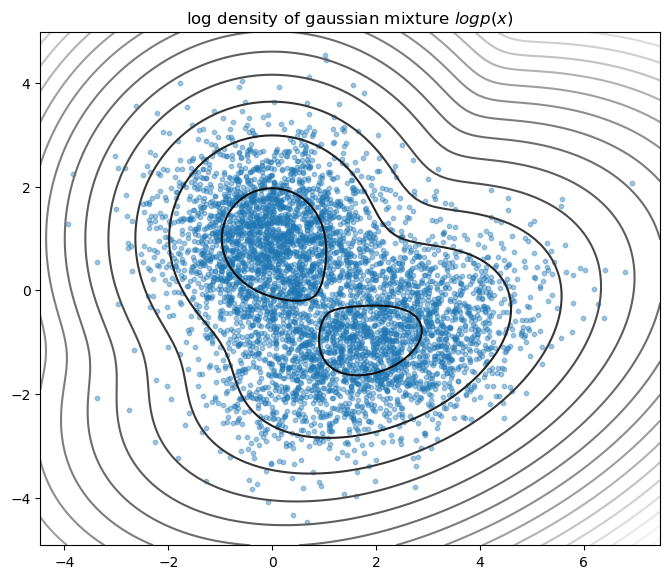

In [35]:
# Gaussian mixture
mu1 = np.array([0, 1.0])
Cov1 = np.array([[1.0, 0.0], [0.0, 1.0]])

mu2 = np.array([2.0, -1.0])
Cov2 = np.array([[2.0, 0.5], [0.5, 1.0]])

gmm = GaussianMixture([mu1, mu2],[Cov1, Cov2], [1.0, 1.0])

show_samples = True  # @param {type:"boolean"}
np.random.seed(42)
gmm_samples, _, _ = gmm.sample(5000)
plt.figure(figsize=[8, 8])
plt.scatter(gmm_samples[:, 0],
            gmm_samples[:, 1],
            s=10,
            alpha=0.4 if show_samples else 0.0)
gmm_pdf_contour_plot(gmm, cmap="Greys", levels=20, logprob=True)
plt.title("log density of gaussian mixture $log p(x)$")
plt.axis("image")
plt.show()

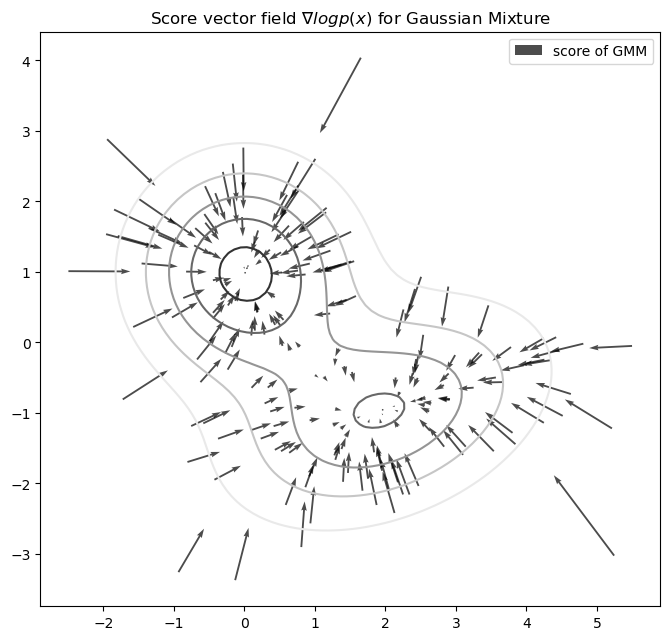

In [36]:
gmm_samps_few, _, _ = gmm.sample(200)
scorevecs_few = gmm.score(gmm_samps_few)
gradvec_list, participance = gmm.score_decompose(gmm_samps_few)

plt.figure(figsize=[8, 8])
quiver_plot(gmm_samps_few, scorevecs_few,
            color="black", scale=25, alpha=0.7, width=0.003,
            label="score of GMM")
gmm_pdf_contour_plot(gmm, cmap="Greys")
plt.title("Score vector field $\\nabla log p(x)$ for Gaussian Mixture")
plt.axis("image")
plt.legend()
plt.show()

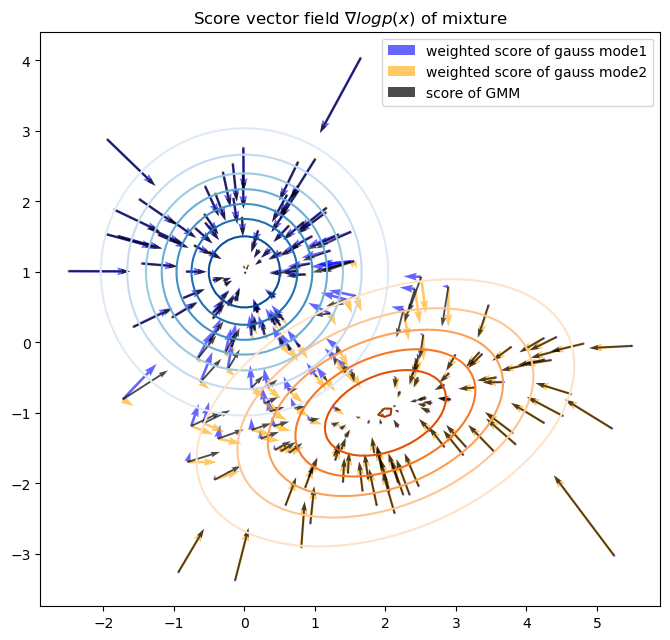

In [37]:
plt.figure(figsize=[8, 8])
quiver_plot(gmm_samps_few, gradvec_list[0]*participance[:, 0:1],
            color="blue", alpha=0.6, scale=25,
            label="weighted score of gauss mode1")
quiver_plot(gmm_samps_few, gradvec_list[1]*participance[:, 1:2],
            color="orange", alpha=0.6, scale=25,
            label="weighted score of gauss mode2")
quiver_plot(gmm_samps_few, scorevecs_few, color="black", scale=25, alpha=0.7,
            width=0.003, label="score of GMM")
gmm_pdf_contour_plot(gmm.RVs[0], cmap="Blues")
gmm_pdf_contour_plot(gmm.RVs[1], cmap="Oranges")
plt.title("Score vector field $\\nabla log p(x)$ of mixture")
plt.axis("image")
plt.legend()
plt.show()

There is [a result in stochastic process literature](https://www.sciencedirect.com/science/article/pii/0304414982900515) 
that if we have the forward process

\begin{equation}
d\mathbf{x} = g(t)d \mathbf{w}
\end{equation}

Then the following process (reverse SDE) will be its time reversal:

\begin{equation}
d\mathbf{x} = -g^2(t) \nabla_\mathbf{x} \log p_t(\mathbf{x}) dt + g(t) d \mathbf{w}.
\end{equation}

where time $t$ runs backward.

<br>

**Time Reversal**: The solution of forward SDE is a sequence of distribution $p_t(\mathbf{x})$ from $t=0\to T$. 
If we start the reverse SDE with the initial distribution $p_T(\mathbf{x})$, then its solution will be the same 
sequence of distribution $p_t(\mathbf{x})$, but only that $t=T\to 0$.

**Implication**  This time reversal is the foundation of the Diffusion model. We can use an interesting distribution as $p_0(\mathbf x)$ connects it with noise via forward diffusion. Then we can sample the noise and convert it back to data via the reverse diffusion process.

In [38]:
def sigma_t_square(t, Lambda):
    """Compute the noise variance sigma_t^2 of the conditional distribution
    for forward process with g(t)=lambda^t

    Formula
      sigma_t^2 = frac{sigma^{2lambda} - 1}{2 ln(lambda)}

    Args:
      t (scalar or ndarray): time
      Lambda (scalar): Lambda

    Returns:
      sigma_t^2
    """
    return (Lambda**(2 * t) - 1) / (2 * np.log(Lambda))


def sigma_t(t, Lambda):
    """Compute the noise std sigma_t of the conditional distribution
    for forward process with g(t)=lambda^t

    Formula
      sigma_t =sqrt{ frac{sigma^{2lambda} - 1}{2 ln(lambda)}}

    Args:
      t (scalar or ndarray): time
      Lambda (scalar): Lambda

    Returns:
      sigma_t
    """
    return np.sqrt((Lambda**(2 * t) - 1) / (2 * np.log(Lambda)))


def diffuse_gmm(gmm, t, Lambda):
  """ Teleport a Gaussian Mixture distribution to $t$ by diffusion forward process

  The distribution p_t(x) (still a Gaussian mixture)
    following the forward diffusion SDE
  """
  sigma_t_2 = sigma_t_square(t, Lambda) 
  noise_cov = np.eye(gmm.dim) * sigma_t_2
  covs_dif = [cov + noise_cov for cov in gmm.covs]
  return GaussianMixture(gmm.mus, covs_dif, gmm.weights)

The **score function** enables the reverse diffusion and **the recovery of the initial distribution.**

In the following cell, I implemented the discretization of the reverse diffusion equation

\begin{equation}
\mathbf{x}_{t-\Delta t} = \mathbf{x}_t + g(t)^2 s(\mathbf{x}_t, t)\Delta t + g(t)\sqrt{\Delta t} \mathbf{z}_t
\end{equation}

where $\mathbf{z}_t \sim \mathcal{N}(\mathbf{0}, I)$ and $g(t)=\lambda^t$. Of course here we use the fact that we know the GMMs density in closed form

In [39]:
def reverse_diffusion_SDE_sampling_gmm(gmm, sampN=500, Lambda=5, nsteps=500):
  """ Using exact score function to simulate the reverse SDE to sample from distribution.

  gmm: Gausian Mixture model class defined above
  sampN: Number of samples to generate
  Lambda: the $lambda$ used in the diffusion coefficient $g(t)=lambda^t$
  nsteps: how many discrete steps do we use to
  """
  # initial distribution $N(0,sigma_T^2 I)$
  sigmaT2 = sigma_t_square(1, Lambda)
  xT = np.sqrt(sigmaT2) * np.random.randn(sampN, 2)
  x_traj_rev = np.zeros((*xT.shape, nsteps, ))
  x_traj_rev[:,:,0] = xT
  dt = 1 / nsteps
  for i in range(1, nsteps):
    t = 1 - i * dt

    # Sample the Gaussian noise $z ~ N(0, I)$
    eps_z = np.random.randn(*xT.shape)

    # Transport the gmm to that at time $t$ and
    gmm_t = diffuse_gmm(gmm, t, Lambda)

    # Compute the score at state $x_t$ and time $t$, $\nabla log p_t(x_t)$
    score_xt = gmm_t.score(x_traj_rev[:, :, i-1])

    # the one time step update equation
    x_traj_rev[:, :, i] = x_traj_rev[:, :, i-1] + eps_z * (Lambda ** t) * np.sqrt(dt) + score_xt * dt * Lambda**(2*t)
  return x_traj_rev

/tmp/ipykernel_5436/4247572342.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figh.show()


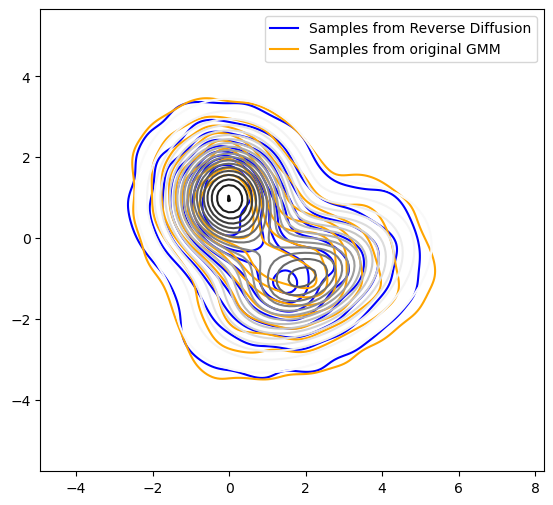

In [40]:
x_traj_rev = reverse_diffusion_SDE_sampling_gmm(gmm, sampN=2500, Lambda=10, nsteps=200)
x0_rev = x_traj_rev[:, :, -1]
gmm_samples, _, _ = gmm.sample(2500)

figh, axs = plt.subplots(1, 1, figsize=[6.5, 6])
handles = []
kdeplot(x0_rev, "Samples from Reverse Diffusion", ax=axs, handles=handles, color="blue")
kdeplot(gmm_samples, "Samples from original GMM", ax=axs, handles=handles, color="orange")
gmm_pdf_contour_plot(gmm, cmap="Greys", levels=20)  # the exact pdf contour of gmm
plt.legend(handles=handles)
figh.show()

#### Exercise: Implement a score-based diffusion model

So far, we have seen that the score function enables the time reversal of the diffusion process. For real datasets, we of course have no access to their density, not to mention their score. However, we have a set of samples $x_i$ from it. The way we estimate the score is called denoising score matching.

We already showed in the theory part that it comes down to predicting the noise and minimizing the MSE between true and predicted noise

1. Sample clean data $x$ from training distribution $x\sim p_0(x)$
2. Sample noise of same shape from i.i.d. Gaussian $\varepsilon \sim \mathcal N(0,I)$
3. Sample time $t$ (or noise scale) and create noised data $\tilde x=x+\sigma_t \varepsilon$
4. Predict the scaled noise at $(\tilde x,t)$ with neural network, minimize the MSE $\|\sigma_ts_\theta(\tilde x,t)+\varepsilon\|^2$

Implement the loss function below. Then train a neural network using the predifined model above. Visulize the outputs of the trained model and compare to the results from the true analytical solution.

You can also try to change the GMM, for example by moving the centers or adding new ones. 

Visualize how the diffusion model transforms the distribution from noise to the target distribution.

In [41]:
def loss_fn(model, x, sigma_t_fun, eta=1e-5):
  """The loss function for training score-based generative models.

  Args:
    model: A PyTorch model instance that represents a
      time-dependent score-based model.
      it takes x, t as arguments.
    x: A mini-batch of training data.
    sigma_t_fun: A function that gives the standard deviation of the conditional dist.
        p(x_t | x_0)
    eta: A tolerance value for numerical stability, sample t uniformly from [eps, 1.0]
  """
  
B, D = x.shape
# Sample times uniformly in [eta, 1]
t = torch.rand(B, device=x.device) * (1.0 - eta) + eta  # shape [B]
# Get sigma_t values (numpy) and convert to torch
sigma_np = sigma_t_fun(t.cpu().numpy())  # shape [B]
sigma = torch.from_numpy(sigma_np).to(x.device).type_as(x)  # [B]
sigma = sigma.view(B, 1)  # for broadcasting

# Sample noise
eps = torch.randn_like(x)
# Create noisy data
x_t = x + sigma * eps
# Predict score
s_pred = model(x_t, t)
# Compute loss: ||sigma * s_pred + eps||^2
loss = ((sigma * s_pred + eps) ** 2).reshape(B, -1).sum(dim=1).mean()
return loss


NameError: name 'x' is not defined

A correctly implemented loss function shall pass the test below.

For a dataset with a single `0` datapoint, we have the analytical score is $\mathbf s(\mathbf x,t)=-\mathbf x/\sigma_t^2$. We test that, for this case, the analytical have zero loss.

In [42]:
sigma_t_test = lambda t: sigma_t(t, Lambda=10)
score_analyt_test = lambda x_t, t: - x_t / sigma_t_test(t)[:, None]**2
x_test = torch.zeros(10, 2)
loss = loss_fn(score_analyt_test, x_test, sigma_t_test, eps=1e-3)
print(f"The loss is zero: {torch.allclose(loss, torch.zeros(1))}")

TypeError: loss_fn() got an unexpected keyword argument 'eps'

In [ ]:
sigma = 25.0
print("sampled 10000 (X, t, score) for training")
X_train_samp, y_train_samp, T_train_samp = sample_X_and_score_t_depend(gmm, sigma=sigma, trainN=10000, partition=500, EPS=0.01)
print("sampled 2000 (X, t, score) for testing")
X_test_samp, y_test_samp, T_test_samp = sample_X_and_score_t_depend(gmm, sigma=sigma, trainN=2000,partition=500, EPS=0.01)
print("Define neural network score approximator")
score_model_td = ScoreModel_Time(sigma=sigma)
sigma_t_f = lambda t: np.sqrt(sigma_t_square(t, sigma))
optim = Adam(score_model_td.parameters(), lr=0.005)
epochs = 500

In [ ]:
########## YOUR SOLUTION HERE ##########

## Neural Ordinary Differential Equations

### Background:

*This assignment discusses the following paper:* Chen, Ricky TQ, Yulia Rubanova, Jesse Bettencourt, and David K. Duvenaud. "Neural ordinary differential equations." Advances in neural information processing systems 31 (2018). https://arxiv.org/abs/1806.07366

Consider a fully connected layer with residual connection defined as
\begin{align*}
    h_{n+1} = h_n + f(h_n, \theta),
\end{align*}
where $f(h_n, \theta)$ is a neural network with parameters $\theta$. 
This is equivalent to applying the Euler method to an ODE of the form
\begin{align*}
    \frac{d h(t)}{dt} = f(h(t), \theta). 
\end{align*}
The Euler method for an ODE of the form given above is defined by 
\begin{align*}
    h_{n+1} = h_n + \eta f(h_n, \theta). 
\end{align*}
So, if we set the step size $\eta = 1$, we recover the residual layer of a ResNet. 
Conversely, if we switch to continuous time, we may write the equation above as
\begin{align*}
    h(t+\eta) &= h(t) + \eta f(h(t), \theta) \\
    \frac{h(t+\eta) - h(t)}{\eta} &= f(h(t), \theta). 
\end{align*}
Now letting $\eta \to 0$ gives $\frac{d h(t)}{dt}$ on the left-hand side while leaving the right-hand side unchanged. 

The initial value problem is $h(0) = h_0 = x$, i.e., we feed inputs $x$ to the first layer. 
We are free to choose any timeline, so without loss of generality we may define $t_0 = 0$ but since the ODE as defined above is time-invariant, we don't need $t_0$ anyway. 

To account for residual layers without weight sharing, we can define $\theta(t)$ as a function of time $t$. 
It is, however, not obvious how this function should look like. 
[Chen et al.](https://arxiv.org/abs/1806.07366) propose an explicit dependence of $f$ on $t$, i.e., $\frac{dh(t)}{dt} = f(h(t), t, \theta)$. 
This lets the weights be shared over time, but gives somewhat more flexibility. 
Ultimately, $\theta(t)$ could be a neural network itself (i.e., fast weights). 

### Exercise 4: The adjoint method (1 pts)

In the following, let $t \in [0, 1]$ and let $h(0) = x$ be the input to our neural ODE model, which is given by 
\begin{align*}
    \frac{d h(t)}{dt} = f(h(t), \theta). 
\end{align*}
We compute the network output as 
\begin{align*}
    \hat y = h(1) = h(0) + \int_0^1 f(h(t), \theta) dt. 
\end{align*}
As usual, we have a loss function $L(\hat y, y)$ and are interested in the gradients with respect to parameters $\theta$. As with conventional neural networks the key to computing these gradients are the deltas, i.e., the derivative of the loss with respect to the activations, i.e., $\partial L / \partial h(t)$ for $t \in [0, 1]$. 
Show that they follow an ODE given by
\begin{align*}
    \frac{d}{dt} \frac{\partial L}{\partial h(t)} = -\frac{\partial L}{\partial h(t)}\frac{\partial f(h(t), \theta)}{\partial h(t)}. 
\end{align*}
This ODE is called the adjoint equation. 
Which initial value problem do we have to solve to obtain the correct gradients? 

*Hint: For some $\varepsilon > 0$, use the chain rule*
\begin{align*}
    \frac{\partial L}{\partial h(t)} = \frac{\partial L}{\partial h(t+\varepsilon)}\frac{\partial h(t+\varepsilon)}{\partial h(t)}
\end{align*}
*and consider the limit as $\varepsilon \to 0$.*

*Note that with slight abuse of notation by $\frac{\partial f(g(t))}{\partial g(t)}$ we mean $\frac{\partial f(x)}{\partial x}|_{x=g(t)}$.*

########## YOUR SOLUTION HERE ##########


1. For small $\varepsilon>0$,  
   $$h(t+\varepsilon)=h(t)+\int_t^{t+\varepsilon}f(h(s),\theta)\,ds
     =h(t)+\varepsilon\,f(h(t),\theta)+o(\varepsilon).$$  
   Hence  
   $$\frac{\partial h(t+\varepsilon)}{\partial h(t)}
     =I+\varepsilon\,\frac{\partial f(h(t),\theta)}{\partial h(t)}+o(\varepsilon).$$

2. By the chain rule,  
   $$\frac{\partial L}{\partial h(t)}
     =\frac{\partial L}{\partial h(t+\varepsilon)}
      \,\frac{\partial h(t+\varepsilon)}{\partial h(t)}.
   $$

3. Substitute the Jacobian expansion:  
   $$
   \begin{aligned}
   \frac{\partial L}{\partial h(t)}
   &=\frac{\partial L}{\partial h(t+\varepsilon)}
     \Bigl(I+\varepsilon\,\frac{\partial f}{\partial h(t)}+o(\varepsilon)\Bigr)\\
   &=\frac{\partial L}{\partial h(t+\varepsilon)}
     +\varepsilon\,\frac{\partial L}{\partial h(t+\varepsilon)}
       \frac{\partial f}{\partial h(t)}+o(\varepsilon).
   \end{aligned}
   $$

4. Rearranged difference quotient:  
   $$
   \begin{aligned}
   \frac{\frac{\partial L}{\partial h(t+\varepsilon)}
         -\frac{\partial L}{\partial h(t)}}{\varepsilon}
   &=-\frac{\partial L}{\partial h(t+\varepsilon)}
     \frac{\partial f}{\partial h(t)}+o(1).
   \end{aligned}
   $$

5. Letting $\varepsilon\to0$ and identifying the derivative,  
   $$\frac{d}{dt}\frac{\partial L}{\partial h(t)}
     =-\frac{\partial L}{\partial h(t)}\,
       \frac{\partial f(h(t),\theta)}{\partial h(t)}.
   $$

6. Initial value problem (backward in time):  
   $$
   \begin{cases}
   \displaystyle\frac{d\,a(t)}{dt}
     =-\,a(t)\,\frac{\partial f(h(t),\theta)}{\partial h(t)},&t\in[0,1],\\[6pt]
   a(1)=\displaystyle\frac{\partial L}{\partial h(1)}\,,
   \end{cases}
   $$  
   where $a(t)=\partial L/\partial h(t)$.  


### Exercise 5 Gradients with respect to parameters¶ (1pts)

#### Exercise 5a) (0.5pts)

Show that the gradients with respect to the parameters follow the ODE
\begin{align*}
    \frac{d}{dt} \frac{\partial L}{\partial \theta} &= -\frac{\partial L}{\partial h(t)} \frac{\partial f(h(t), \theta)}{\partial \theta}. 
\end{align*}

*Hint: The parameters are shared in time. To correctly account for the usage of $\theta$ along the trajectory, it is helpful to consider $\theta(t) = \theta$ as a constant function of time with $\dot \theta(t) = 0$.
In that light, for some $\varepsilon > 0$, use the chain rule*
\begin{align*}
    \frac{\partial L}{\partial \theta(t)} = \frac{\partial L}{\partial h(t+\varepsilon)}\frac{\partial h(t+\varepsilon)}{\partial \theta(t)} + \frac{\partial L}{\partial \theta(t+\varepsilon)}\frac{\partial \theta(t+\varepsilon)}{\partial \theta(t)}.
\end{align*}

########## YOUR SOLUTION HERE ##########

1. Define $\theta(t)=\theta$ so $\dot\theta(t)=0$.  
2. For small $\varepsilon>0$,  
   $$
   h(t+\varepsilon)=h(t)+\varepsilon\,f(h(t),\theta)+o(\varepsilon)
   \quad\Longrightarrow\quad
   \frac{\partial h(t+\varepsilon)}{\partial \theta(t)}
   =\varepsilon\,\frac{\partial f(h(t),\theta)}{\partial \theta}+o(\varepsilon).
   $$  
3. Also  
   $$
   \theta(t+\varepsilon)=\theta(t)+o(\varepsilon)
   \quad\Longrightarrow\quad
   \frac{\partial \theta(t+\varepsilon)}{\partial \theta(t)}
   =I+o(\varepsilon).
   $$  
4. By the chain rule,  
   $$
   \frac{\partial L}{\partial \theta(t)}
   =\frac{\partial L}{\partial h(t+\varepsilon)}
     \frac{\partial h(t+\varepsilon)}{\partial \theta(t)}
   +\frac{\partial L}{\partial \theta(t+\varepsilon)}
     \frac{\partial \theta(t+\varepsilon)}{\partial \theta(t)}.
   $$  
5. Substitute expansions:  
   $$
   \frac{\partial L}{\partial \theta(t)}
   =\frac{\partial L}{\partial h(t+\varepsilon)}
     \Bigl(\varepsilon\,\frac{\partial f}{\partial \theta}\Bigr)
   +\frac{\partial L}{\partial \theta(t+\varepsilon)}
   +o(\varepsilon).
   $$  
6. Rearranged difference quotient:  
   $$
   \frac{\tfrac{\partial L}{\partial \theta(t+\varepsilon)}
         -\tfrac{\partial L}{\partial \theta(t)}}{\varepsilon}
   =-\frac{\partial L}{\partial h(t+\varepsilon)}
     \frac{\partial f}{\partial \theta}
   +o(1).
   $$  
7. Letting $\varepsilon\to0$ yields  
   $$
   \frac{d}{dt}\frac{\partial L}{\partial \theta(t)}
   =-\frac{\partial L}{\partial h(t)}
     \frac{\partial f(h(t),\theta)}{\partial \theta}.
   $$


#### Exercise 5b) (0.5pts)

What happens to $\frac{\partial L}{\partial \theta(t)}$ when $\theta(t)$ becomes an arbitrary differentiable function of time instead of a constant? 

########## YOUR SOLUTION HERE ##########


1. Now let $\theta(t)$ be any differentiable function. For small $\varepsilon>0$,
   $$
   h(t+\varepsilon)=h(t)+\varepsilon\,f(h(t),\theta(t))+o(\varepsilon)
   \quad\Longrightarrow\quad
   \frac{\partial h(t+\varepsilon)}{\partial \theta(t)}
   =\varepsilon\,\frac{\partial f(h(t),\theta(t))}{\partial \theta(t)}+o(\varepsilon),
   $$
   and
   $$
   \theta(t+\varepsilon)=\theta(t)+\varepsilon\,\dot\theta(t)+o(\varepsilon)
   \quad\Longrightarrow\quad
   \frac{\partial \theta(t+\varepsilon)}{\partial \theta(t)}
   =I+o(1).
   $$

2. By the chain rule,
   $$
   \frac{\partial L}{\partial \theta(t)}
   =\frac{\partial L}{\partial h(t+\varepsilon)}
     \frac{\partial h(t+\varepsilon)}{\partial \theta(t)}
   +\frac{\partial L}{\partial \theta(t+\varepsilon)}
     \frac{\partial \theta(t+\varepsilon)}{\partial \theta(t)}.
   $$

3. Substitute and collect terms:
   $$
   \begin{aligned}
   \frac{\partial L}{\partial \theta(t)}
   &=\frac{\partial L}{\partial h(t+\varepsilon)}
     \Bigl(\varepsilon\,\tfrac{\partial f}{\partial \theta}+o(\varepsilon)\Bigr)
   +\frac{\partial L}{\partial \theta(t+\varepsilon)}\,(I+o(1))\\
   &=\frac{\partial L}{\partial \theta(t+\varepsilon)}
   +\varepsilon\,\frac{\partial L}{\partial h(t+\varepsilon)}
     \frac{\partial f}{\partial \theta}+o(\varepsilon).
   \end{aligned}
   $$

4. Form the difference quotient and let $\varepsilon\to0$:
   $$
   \frac{\tfrac{\partial L}{\partial \theta(t+\varepsilon)}
         -\tfrac{\partial L}{\partial \theta(t)}}{\varepsilon}
   =-\frac{\partial L}{\partial h(t+\varepsilon)}
     \frac{\partial f(h(t),\theta(t))}{\partial \theta(t)}
   +o(1)
   \;\Longrightarrow\;
   \frac{d}{dt}\frac{\partial L}{\partial \theta(t)}
   =-\frac{\partial L}{\partial h(t)}
     \frac{\partial f(h(t),\theta(t))}{\partial \theta(t)}.
   $$


### Exercise 6: Implementing a neural ODE (1pts)

#### Setting up a toy dataset

In [43]:
%matplotlib inline
import time
import logging
import statistics
from typing import Optional, List

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from torch.nn.utils import parameters_to_vector as p2v


import torch
import torch.nn as nn
import torch.utils.data as data
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split

class MoonsDataset(Dataset):
    """Half Moons Classification Dataset

    Adapted from https://github.com/DiffEqML/torchdyn
    """
    def __init__(self, num_samples=100, noise_std=1e-4):
        self.num_samples = num_samples
        self.noise_std = noise_std
        self.X, self.y = self.generate_moons(num_samples, noise_std)

    @staticmethod
    def generate_moons(num_samples=100, noise_std=1e-4):
        """Creates a *moons* dataset of `num_samples` data points.
        :param num_samples: number of data points in the generated dataset
        :type num_samples: int
        :param noise_std: standard deviation of noise magnitude added to each data point
        :type noise_std: float
        """
        num_samples_out = num_samples // 2
        num_samples_in = num_samples - num_samples_out
        theta_out = np.linspace(0, np.pi, num_samples_out)
        theta_in = np.linspace(0, np.pi, num_samples_in)
        outer_circ_x = np.cos(theta_out)
        outer_circ_y = np.sin(theta_out)
        inner_circ_x = 1 - np.cos(theta_in)
        inner_circ_y = 1 - np.sin(theta_in) - 0.5

        X = np.vstack([np.append(outer_circ_x, inner_circ_x),
                       np.append(outer_circ_y, inner_circ_y)]).T
        y = np.hstack([np.zeros(num_samples_out), np.ones(num_samples_in)])

        if noise_std is not None:
            X += noise_std * np.random.rand(num_samples, 2)

        X = torch.Tensor(X)
        y = torch.LongTensor(y)
        return X, y

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

def plot_binary_classification_dataset(X, y, title=None):
    CLASS_COLORS = ['coral', 'darkviolet']
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(X[:, 0], X[:, 1], color=[CLASS_COLORS[yi.int()] for yi in y], alpha=0.6)
    ax.set_aspect('equal')
    if title is not None:
        ax.set_title(title)

    return fig, ax

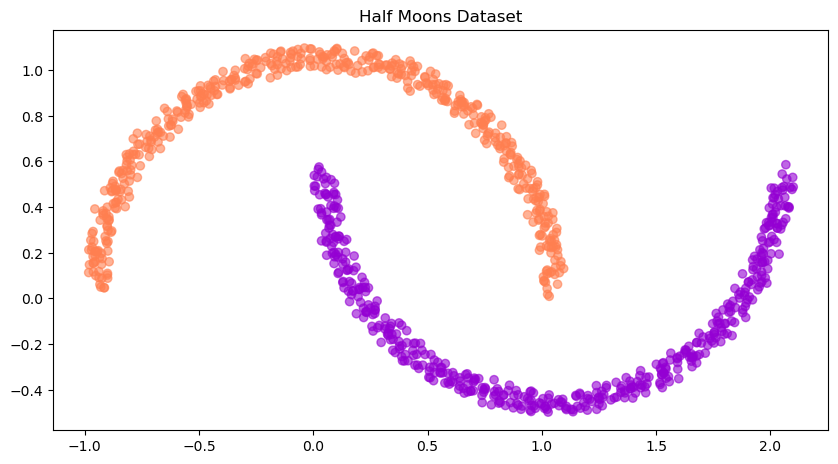

In [44]:
total_samples = 1000

moons_dataset = MoonsDataset(num_samples=total_samples, noise_std=1e-1)
fig, ax = plot_binary_classification_dataset(moons_dataset.X, moons_dataset.y, title='Half Moons Dataset')

In [45]:
train_size = int(0.7 * total_samples)
val_size = int(0.15 * total_samples)
test_size = total_samples - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    moons_dataset, [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42) # For reproducibility
)

print(f"Total samples: {len(moons_dataset)}")
print(f"Train samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")

Total samples: 1000
Train samples: 700
Validation samples: 150
Test samples: 150


In [46]:
batch_size = 32 # You can adjust your desired batch size

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

#### Exercise 6a) Train Neural ODE on Moon dataset (0.5 pts)

Using a deep learning framework like PyTorch, we can implement Neural ODEs in two different ways. 
One way is to explicitly implement the forward and backward ODEs as derived in the previous exercises. 
Alternatively, we can implmement an ODE solver using PyTorch operations. 
Then PyTorch will differentiate through the solver automatically. 
This sidesteps the need for an implementation of the adjoint method. 
The code below implements a Neural ODE module in PyTorch. 
Add a `forward` function to the class `ODEBlock` that implements the standard Runge-Kutta solver with fixed step size $\eta$ as defined by
\begin{align*}
    h_{n+1} &= h_n + \frac{\eta}{6}(k_1 + 2 k_2 + 2 k_3 + k_4) \\
    t_{n+1} &= t_n + \eta \\
    k_1 &= f(t_n, h_n) \\
    k_2 &= f(t_n + \frac{\eta}{2}, h_n + \eta \frac{k_1}{2}) \\
    k_3 &= f(t_n + \frac{\eta}{2}, h_n + \eta \frac{k_2}{2}) \\
    k_4 &= f(t_n + \eta, h_n + \eta k_3). 
\end{align*}
Moreover, add a training/validation loop for the moon dataset, train the model, visualize the training loss, validation accuracy and discuss your results. 


In [47]:
class _ODEFunc(nn.Module):
    def __init__(self, module, autonomous=True):
        super().__init__()
        self.module = module
        self.autonomous = autonomous

    def forward(self, t, x):
        if not self.autonomous:
            x = torch.cat([torch.ones_like(x[:, [0]]) * t, x], 1)
        return self.module(x)


class ODEBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self._odefunc = _ODEFunc(nn.Sequential(
            nn.Linear(dim, 64),
            nn.Tanh(),
            nn.Linear(64, dim))
        )

    def forward(self, x, t0=0, t1=1, step_size=0.1):
        ###Implement ME
        t = t0
        h = x
        n_steps = int((t1 - t0) / step_size)
        for _ in range(n_steps):
            k1 = self._odefunc(t, h)
            k2 = self._odefunc(t + step_size/2, h + step_size * k1 / 2)
            k3 = self._odefunc(t + step_size/2, h + step_size * k2 / 2)
            k4 = self._odefunc(t + step_size,   h + step_size * k3)
            h = h + (step_size / 6) * (k1 + 2*k2 + 2*k3 + k4)
            t = t + step_size
        return h

In [48]:
curve_train_loss, curve_train_acc = [], []
train_len = len(train_dataloader)
curve_val_loss, curve_val_acc = [], []
val_len = len(val_dataloader)
model = ODEBlock(2)
optimizer = torch.optim.Adam(model.parameters(), lr=5.e-3)
device = torch.device('cpu')
epochs = 50

print(p2v(model.parameters()).numel(), 'parameters')

322 parameters


NameError: name 'train_loader' is not defined

#### Exercise 6b): Visualization (0.5pts)

Use the trained model to run inference and visualize the trajectories using a dense time span.
Made 2D plots of the trajectory only in $x$ and only in $y$ direction.
Then combine them in a 3D visualization using the matplotlib 3D projection, see the matplotlib gallery for inspiration: https://matplotlib.org/stable/gallery/mplot3d/lorenz_attractor.html#sphx-glr-gallery-mplot3d-lorenz-attractor-py

If you want to you also implement a 3D animation.

In [ ]:
########## YOUR SOLUTION HERE ##########